## Import Packages


In [218]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

## Load Dataset


In [219]:
# Loading and examining the dataset
insurance_df = pd.read_csv("/kaggle/input/insurance/insurance.csv")
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [220]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [221]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [222]:
insurance_df['sex'].replace(['female', 'male'], [0,1], inplace=True)
insurance_df['smoker'].replace(['no', 'yes'], [0,1], inplace=True)

In [223]:
insurance_df = insurance_df.drop(columns=['region'])

In [224]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [225]:
insurance_df = insurance_df.drop('sex', axis=1)

## Perform preprocessing steps on the dataset - scaling


In [226]:
scaler = StandardScaler()
X = scaler.fit_transform(insurance_df)
insurance_preprocessed = pd.DataFrame(data=X, columns=insurance_df.columns)
insurance_preprocessed.head(10)

,age,bmi,children,smoker,charges
0,-1.438764,-0.453320,-0.908614,1.970587,0.298584
1,-1.509965,0.509621,-0.078767,-0.507463,-0.953689
2,-0.797954,0.383307,1.580926,-0.507463,-0.728675
3,-0.441948,-1.305531,-0.908614,-0.507463,0.719843
4,-0.513149,-0.292556,-0.908614,-0.507463,-0.776802
5,-0.584350,-0.807656,-0.908614,-0.507463,-0.785908
6,0.483668,0.455486,-0.078767,-0.507463,-0.415500
7,-0.157143,-0.479567,1.580926,-0.507463,-0.494728
8,-0.157143,-0.136714,0.751079,-0.507463,-0.567017
9,1.480485,-0.791252,-0.908614,-0.507463,1.293027


In [227]:
insurance_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   float64
 3   smoker    1338 non-null   float64
 4   charges   1338 non-null   float64
dtypes: float64(5)
memory usage: 52.4 KB


## Perform PCA


In [228]:
pca = PCA(n_components=None)
dfx_pca = pca.fit(insurance_preprocessed)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
insurance_PCA = pca.fit_transform(insurance_preprocessed)
print(n_components)

4


Text(0, 0.5, 'Calinski-Hara')

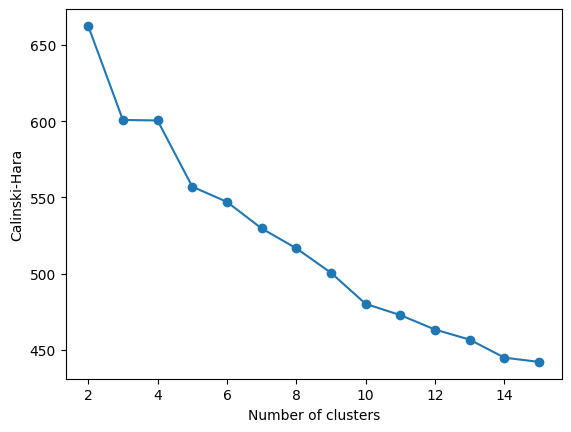

In [229]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

calinski_scores = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(insurance_PCA)
    calinski_score = calinski_harabasz_score(insurance_PCA, cluster_labels)
    calinski_scores.append(calinski_score)

plt.plot(range(2, 16), calinski_scores, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Hara")

## Detect the optimal number of clusters for k-means clustering


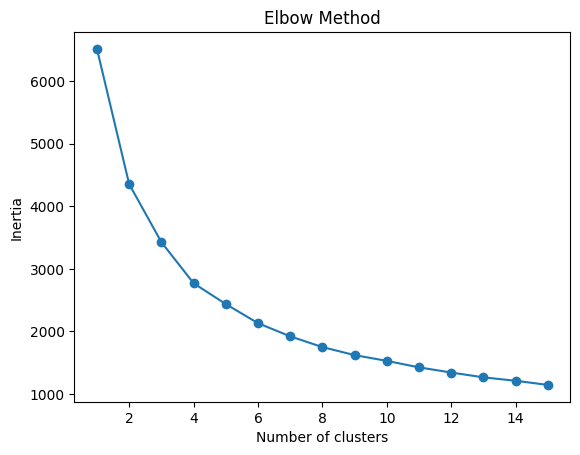

In [230]:
inertia = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(insurance_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 16), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


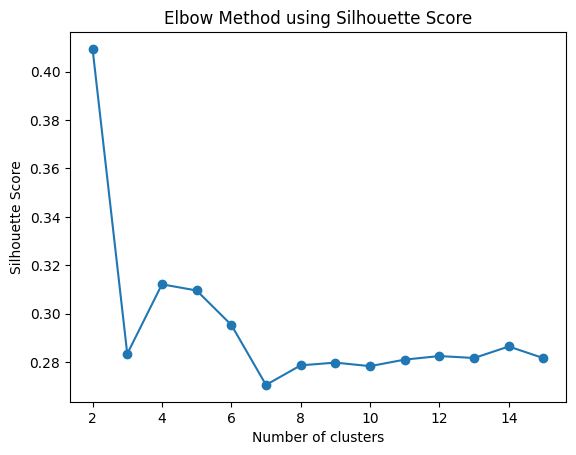

In [231]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(insurance_PCA)
    silhouette_avg = silhouette_score(insurance_PCA, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 16), silhouette_scores, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Elbow Method using Silhouette Score")
plt.show()

## Run the k-means clustering algorithm


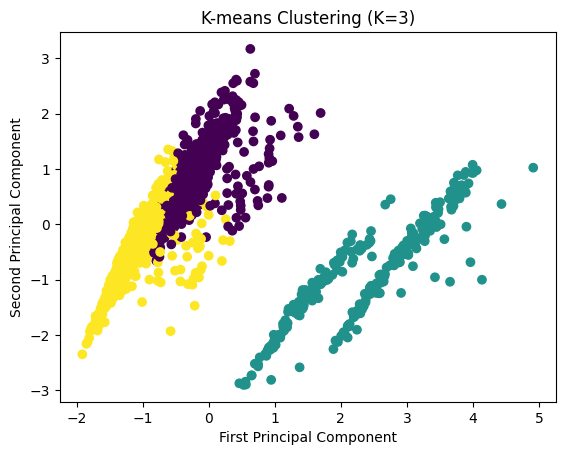

In [232]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(insurance_PCA)
plt.scatter(insurance_PCA[:, 0], insurance_PCA[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={n_clusters})")
plt.show()

In [233]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Melakukan clustering dengan jumlah cluster yang telah ditentukan
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(insurance_PCA)
cluster_labels = kmeans.labels_

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(insurance_PCA, cluster_labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.2833696622454027
